# Machine Learning Project

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

# 1 Data Loading 

In [55]:
data=pd.read_csv(r'C:\Users\hp\Pictures/Tesla.csv',parse_dates=['Date'], index_col='Date')
#data=pd.read_csv("Tesla.csv",parse_dates=['Date'], index_col='Date')
#data=pd.read_csv(r'C:\Users\hp\Downloads\Market.csv.zip',parse_dates=['Date'], index_col='Date')

In [56]:
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


# 2 Data preprocessing 

In [57]:
#convert Date in to datetime and sort
#data["Date"]=pd.to_datetime(data['Date'])
#data=data.sort_values(by='Date')


In [58]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


In [60]:
data.shape

(1692, 6)

In [61]:
data[data['Close'] == data['Adj Close']].shape #Close and Adj Close are equal

(1692, 6)

In [62]:
data=data.drop(["Adj Close"],axis=1)

In [63]:
#data=data.drop(["Index"],axis=1)

In [64]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [65]:
data.shape

(1692, 5)

In [66]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# 3 Visualization

<Axes: title={'center': 'Stock Closing Price Over Time'}, xlabel='Date'>

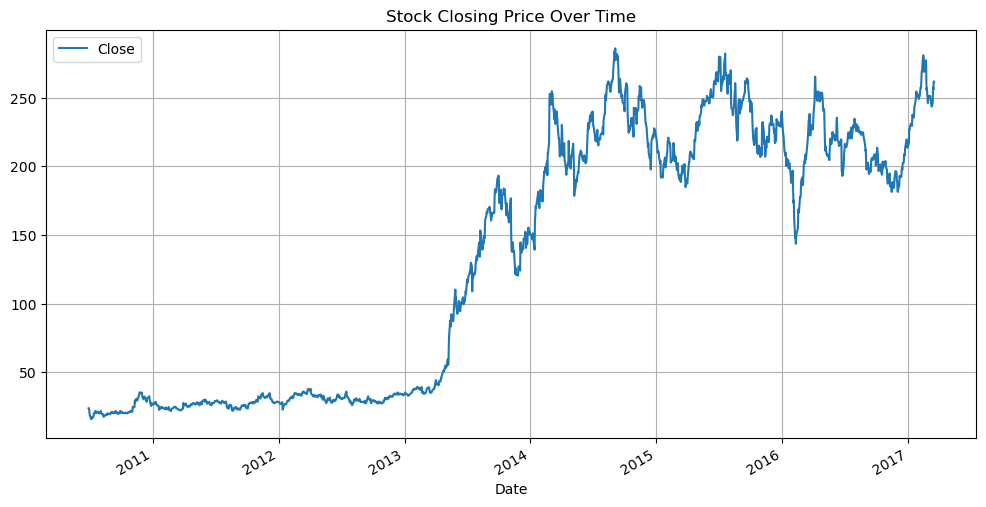

In [67]:
data.plot.line(y="Close", use_index=True, title="Stock Closing Price Over Time", figsize=(12,6), grid=True)


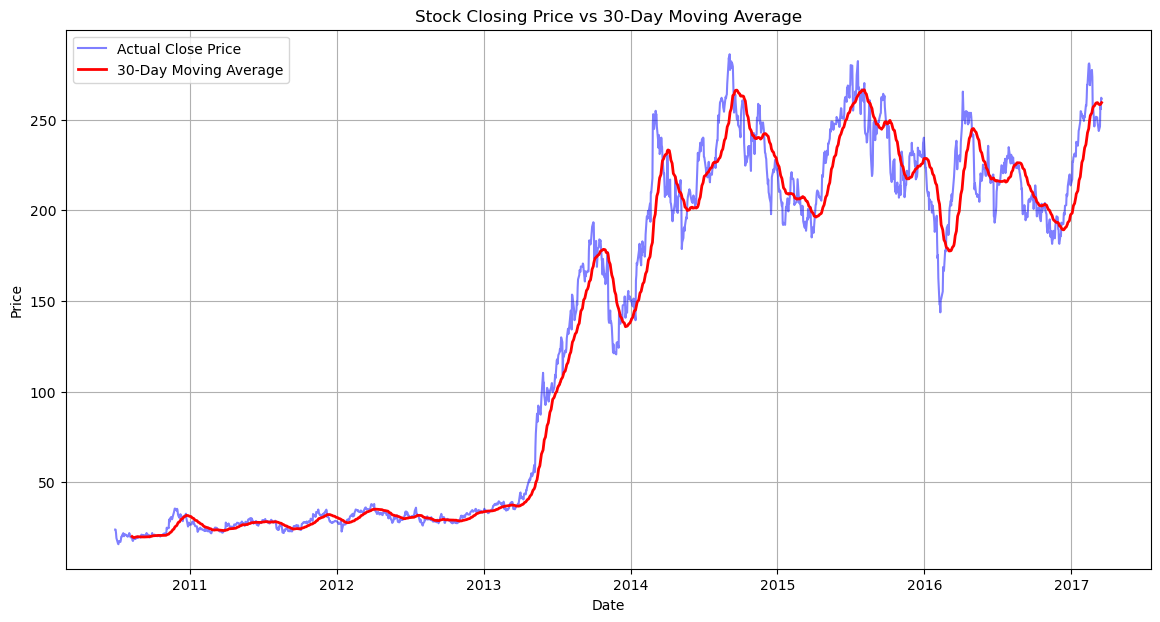

In [68]:
import matplotlib.pyplot as plt

data['Open_MA30'] = data['Open'].rolling(window=30).mean() #Takes the average of the last 30 days for every point
data['High_MA30'] = data['High'].rolling(window=30).mean()
data['Low_MA30'] = data['Low'].rolling(window=30).mean()
data['Close_MA30'] = data['Close'].rolling(window=30).mean()
data['Volume_MA30'] = data['Volume'].rolling(window=30).mean()

# Plot both Close price and 30-day moving average
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Actual Close Price', color='blue', alpha=0.5)
plt.plot(data.index, data['Close_MA30'], label='30-Day Moving Average', color='red', linewidth=2)

plt.title('Stock Closing Price vs 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
data.head()

,Open,High,Low,Close,Volume,Open_MA30,High_MA30,Low_MA30,Close_MA30,Volume_MA30
Date,,,,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,NaN,NaN,NaN,NaN,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,NaN,NaN,NaN,NaN,NaN
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,NaN,NaN,NaN,NaN,NaN
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,NaN,NaN,NaN,NaN,NaN
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,NaN,NaN,NaN,NaN,NaN


In [70]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Open_MA30      29
High_MA30      29
Low_MA30       29
Close_MA30     29
Volume_MA30    29
dtype: int64

In [71]:
data = data.dropna(subset=['Open_MA30','High_MA30','Low_MA30','Close_MA30','Volume_MA30'])


In [72]:
data.head(10)


,Open,High,Low,Close,Volume,Open_MA30,High_MA30,Low_MA30,Close_MA30,Volume_MA30
Date,,,,,,,,,,
2010-08-10,19.650000,19.650000,18.820000,19.030001,1281300,20.365667,21.176666,19.194000,20.041333,3.567430e+06
2010-08-11,18.690001,18.879999,17.850000,17.900000,797600,20.355334,20.972666,19.204333,19.841667,2.968473e+06
2010-08-12,17.799999,17.900000,17.389999,17.600000,691000,20.089000,20.555333,19.007333,19.634000,2.418603e+06
2010-08-13,18.180000,18.450001,17.660000,18.320000,634000,19.861667,20.306333,18.920333,19.512667,2.165777e+06
2010-08-16,18.450001,18.799999,18.260000,18.780001,485800,19.710000,20.163000,18.905333,19.498667,2.010643e+06
2010-08-17,18.959999,19.400000,18.780001,19.150000,447900,19.675334,20.143000,19.003667,19.600000,1.796677e+06
2010-08-18,19.590000,19.590000,18.600000,18.770000,601300,19.781667,20.241666,19.124333,19.699000,1.585997e+06
2010-08-19,18.540001,19.250000,18.330000,18.790001,579100,19.861667,20.299333,19.216333,19.743333,1.348253e+06
2010-08-20,18.650000,19.110001,18.510000,19.100000,296000,19.897334,20.339667,19.281667,19.800000,1.223100e+06


In [73]:
data.shape

(1663, 10)

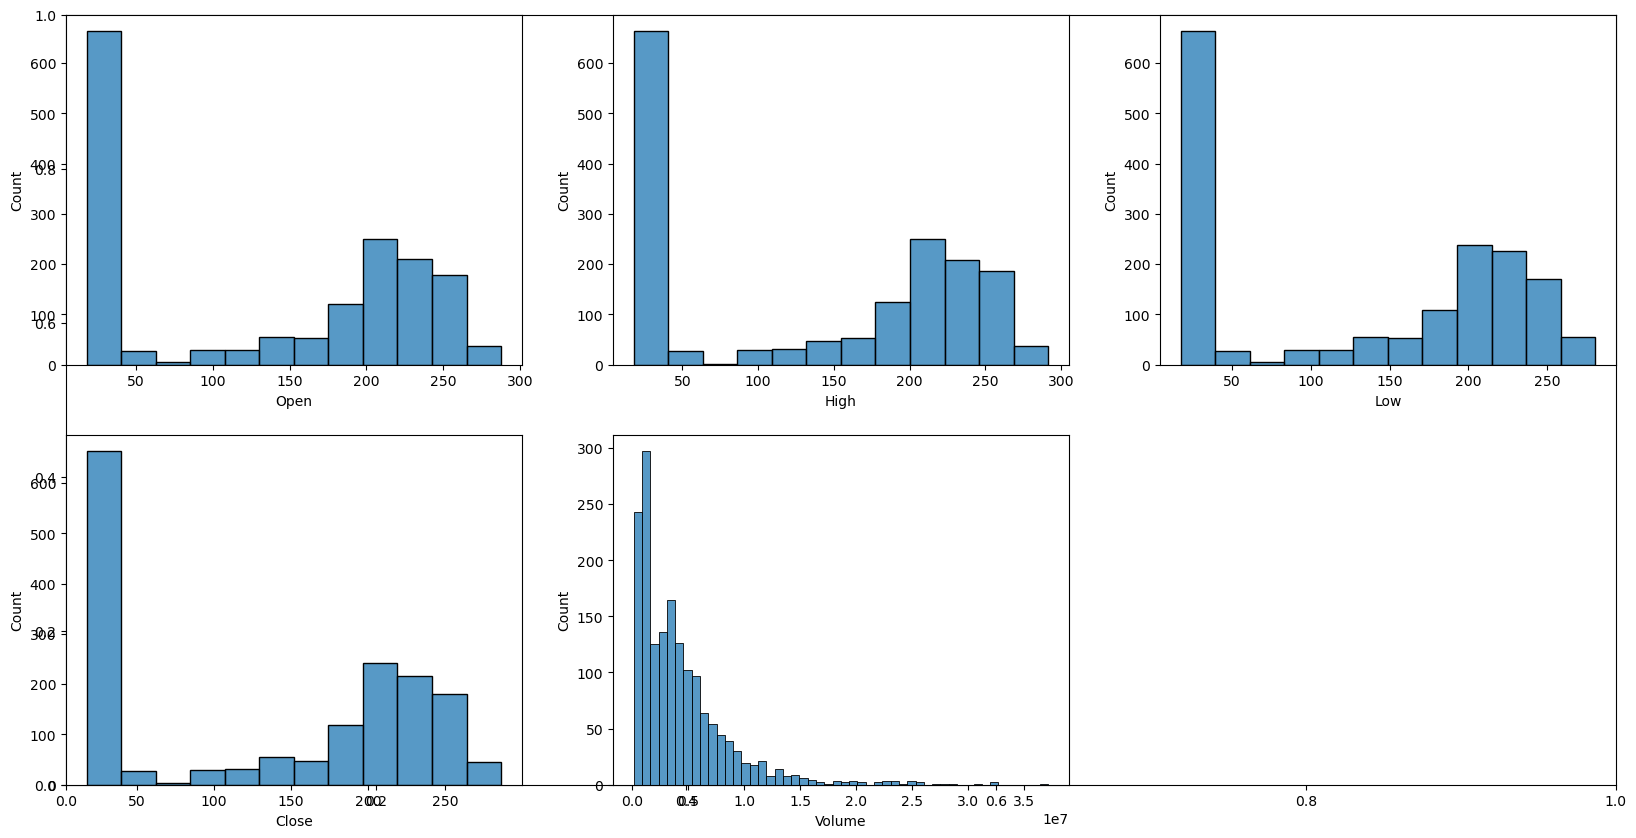

In [74]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):  #gives we both the index (i) and the column name (col)
  plt.subplot(2,3,i+1) # creates a grid of 2 rows × 3 columns.
  sb.histplot(data[col])
plt.show()

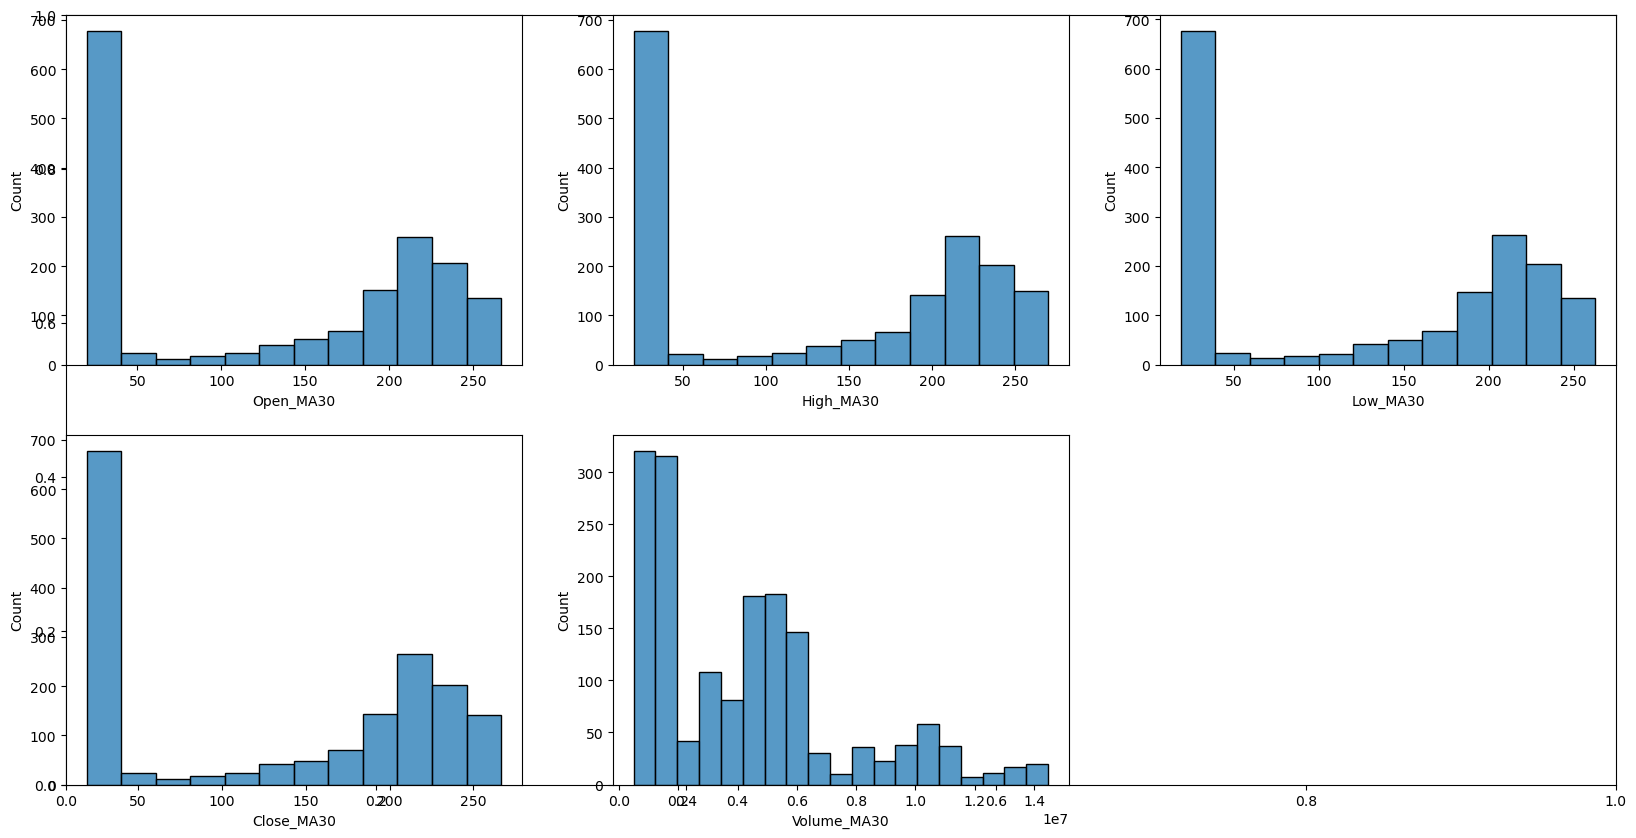

In [75]:
features_1 = ['Open_MA30','High_MA30','Low_MA30','Close_MA30','Volume_MA30']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features_1):  #gives we both the index (i) and the column name (col)
  plt.subplot(2,3,i+1) # creates a grid of 2 rows × 3 columns.
  sb.histplot(data[col])
plt.show()

# What can we learn from these histograms?
### Feature(Open, High, Low, Close) -> What the histogram tells : How stock prices are distributed: Are they concentrated around certain values? Are they skewed (mostly small values or mostly big values)?.
### Feature(Volume ) -> What the histogram tells : How much trading activity there is: Are most days low volume? Are there some spikes with very high                           trading volume?

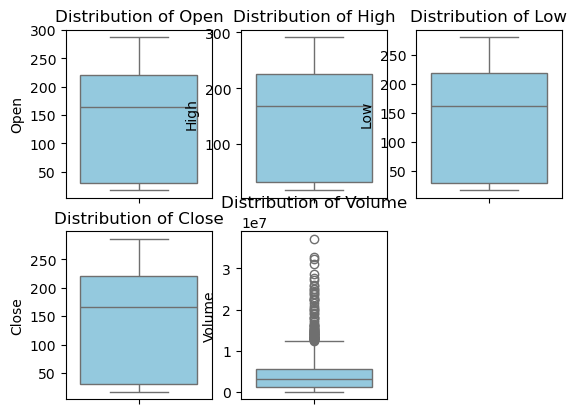

In [76]:
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(y=data[col], color='skyblue')
    plt.title(f'Distribution of {col}')


In [77]:
#sb.boxplot(data_clean_close["Close"])

## Detect and Remove outliers 

In [78]:
def detect_outliers_all_features(data, features):
    outliers_dict = {}

    for col in features:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_dict[col] = outliers

        print(f"{col}: {len(outliers)} outliers detected.")
    
    return outliers_dict

# Apply to your features
outliers_all = detect_outliers_all_features(data, features)
outliers_all 

Open: 0 outliers detected.
High: 0 outliers detected.
Low: 0 outliers detected.
Close: 0 outliers detected.
Volume: 77 outliers detected.


{'Open': Empty DataFrame
 Columns: [Open, High, Low, Close, Volume, Open_MA30, High_MA30, Low_MA30, Close_MA30, Volume_MA30]
 Index: [],
 'High': Empty DataFrame
 Columns: [Open, High, Low, Close, Volume, Open_MA30, High_MA30, Low_MA30, Close_MA30, Volume_MA30]
 Index: [],
 'Low': Empty DataFrame
 Columns: [Open, High, Low, Close, Volume, Open_MA30, High_MA30, Low_MA30, Close_MA30, Volume_MA30]
 Index: [],
 'Close': Empty DataFrame
 Columns: [Open, High, Low, Close, Volume, Open_MA30, High_MA30, Low_MA30, Close_MA30, Volume_MA30]
 Index: [],
 'Volume':                   Open        High         Low       Close    Volume  \
 Date                                                                   
 2013-04-01   42.360001   46.680000   41.700001   43.930000  14098500   
 2013-05-09   70.120003   75.769997   63.689999   69.400002  28605000   
 2013-05-10   69.650002   81.000000   69.250000   76.760002  25082600   
 2013-05-13   80.989998   88.000000   79.150002   87.800003  22416900   
 201

In [79]:
def remove_outliers_all_features(data, features):
    for col in features:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data

# Cleaned dataset
data = remove_outliers_all_features(data, features)


In [80]:
remove_outliers_all_features(data, features)

,Open,High,Low,Close,Volume,Open_MA30,High_MA30,Low_MA30,Close_MA30,Volume_MA30
Date,,,,,,,,,,
2010-08-10,19.650000,19.650000,18.820000,19.030001,1281300,20.365667,21.176666,19.194000,20.041333,3.567430e+06
2010-08-11,18.690001,18.879999,17.850000,17.900000,797600,20.355334,20.972666,19.204333,19.841667,2.968473e+06
2010-08-12,17.799999,17.900000,17.389999,17.600000,691000,20.089000,20.555333,19.007333,19.634000,2.418603e+06
2010-08-13,18.180000,18.450001,17.660000,18.320000,634000,19.861667,20.306333,18.920333,19.512667,2.165777e+06
2010-08-16,18.450001,18.799999,18.260000,18.780001,485800,19.710000,20.163000,18.905333,19.498667,2.010643e+06
...,...,...,...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,257.857335,261.347334,254.985001,258.219003,5.269913e+06
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,257.643335,261.441668,254.949001,258.464670,5.395727e+06
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,257.902001,261.612001,255.168001,258.591337,5.419077e+06


In [81]:
remove_outliers_all_features(data, features_1)

,Open,High,Low,Close,Volume,Open_MA30,High_MA30,Low_MA30,Close_MA30,Volume_MA30
Date,,,,,,,,,,
2010-08-10,19.650000,19.650000,18.820000,19.030001,1281300,20.365667,21.176666,19.194000,20.041333,3.567430e+06
2010-08-11,18.690001,18.879999,17.850000,17.900000,797600,20.355334,20.972666,19.204333,19.841667,2.968473e+06
2010-08-12,17.799999,17.900000,17.389999,17.600000,691000,20.089000,20.555333,19.007333,19.634000,2.418603e+06
2010-08-13,18.180000,18.450001,17.660000,18.320000,634000,19.861667,20.306333,18.920333,19.512667,2.165777e+06
2010-08-16,18.450001,18.799999,18.260000,18.780001,485800,19.710000,20.163000,18.905333,19.498667,2.010643e+06
...,...,...,...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,257.857335,261.347334,254.985001,258.219003,5.269913e+06
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,257.643335,261.441668,254.949001,258.464670,5.395727e+06
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,257.902001,261.612001,255.168001,258.591337,5.419077e+06


<Axes: ylabel='Close'>

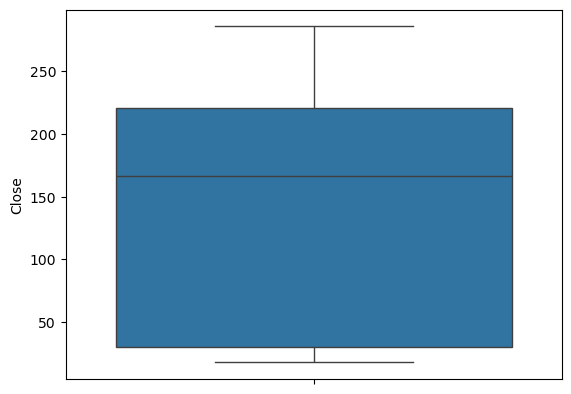

In [82]:
#sb.boxplot(data["Close"])
sb.boxplot(data["Close"])

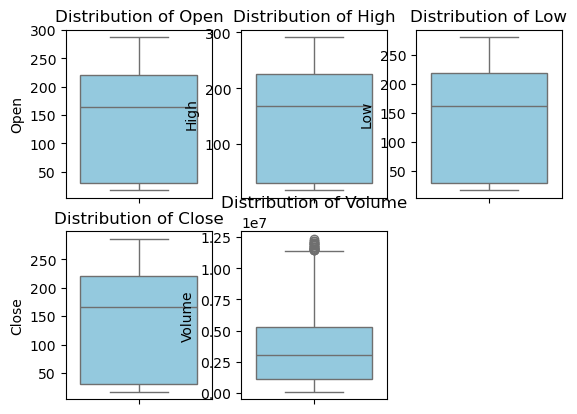

In [83]:
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(y=data[col], color='skyblue')
    plt.title(f'Distribution of {col}')

In [84]:
data

,Open,High,Low,Close,Volume,Open_MA30,High_MA30,Low_MA30,Close_MA30,Volume_MA30
Date,,,,,,,,,,
2010-08-10,19.650000,19.650000,18.820000,19.030001,1281300,20.365667,21.176666,19.194000,20.041333,3.567430e+06
2010-08-11,18.690001,18.879999,17.850000,17.900000,797600,20.355334,20.972666,19.204333,19.841667,2.968473e+06
2010-08-12,17.799999,17.900000,17.389999,17.600000,691000,20.089000,20.555333,19.007333,19.634000,2.418603e+06
2010-08-13,18.180000,18.450001,17.660000,18.320000,634000,19.861667,20.306333,18.920333,19.512667,2.165777e+06
2010-08-16,18.450001,18.799999,18.260000,18.780001,485800,19.710000,20.163000,18.905333,19.498667,2.010643e+06
...,...,...,...,...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,257.857335,261.347334,254.985001,258.219003,5.269913e+06
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,257.643335,261.441668,254.949001,258.464670,5.395727e+06
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,257.902001,261.612001,255.168001,258.591337,5.419077e+06


## Why Detect Outliers?
#### Improve model performance -> Many machine learning models (like Linear Regression) get skewed by extreme values. Outliers can distort                                                the learned patterns.
#### Better statistics -> 	Outliers can inflate or deflate averages, standard deviation, and variance, making your data summary misleading.
#### Cleaner visualizations -> 	Outliers can stretch graphs (like histograms and boxplots), making it harder to see the overall pattern.
#### Anomaly detection	-> In fraud or error detection, outliers are actually the point — they may indicate mistakes, fraud, or rare events worth attention.

## Why Remove Outliers?
#### -To make your dataset more robust, accurate, and stable.
#### -To avoid noise in training a model.
#### -To improve generalization of ML models — meaning they perform better on new, unseen data



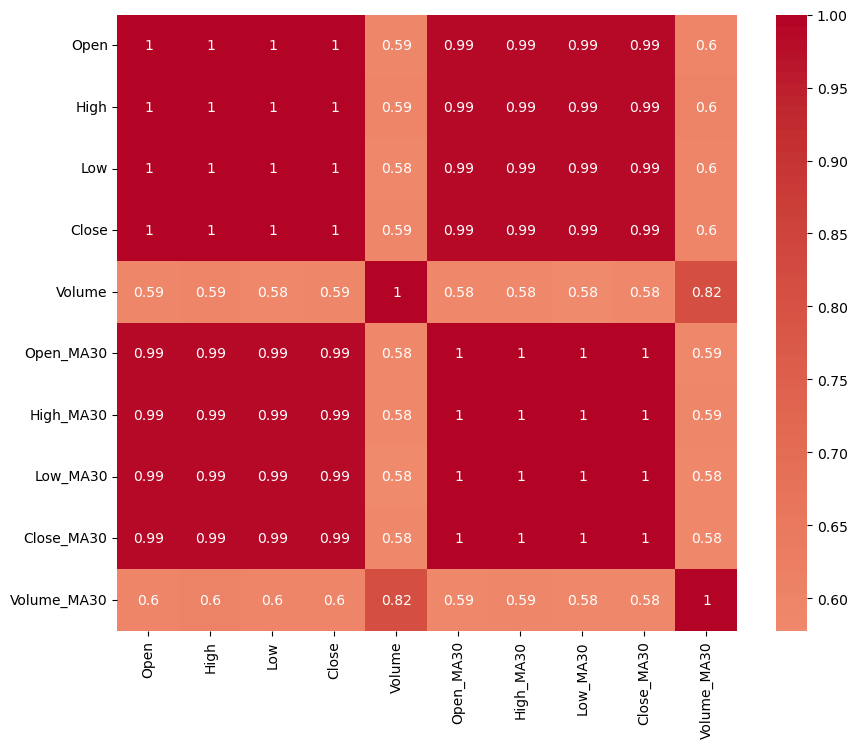

In [85]:
plt.figure(figsize=(10,8))
sb.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()


## interpretation  
### 1.	data.corr()
#### This calculates the correlation matrix between all numeric columns of your data DataFrame.
#### Correlation means how strongly two variables move together.
#### Value close to +1 → strong positive correlation (they move together).
#### Value close to -1 → strong negative correlation (they move oppositely).
#### Value around 0 → no correlation (no clear relationship).
### 2.	sb.heatmap(..., annot=True)
#### sb is seaborn, a popular plotting library.
#### heatmap() creates a colored grid where each cell represents a correlation value.
#### annot=True means show the actual correlation numbers inside each square (not just colors).
### 3.	plt.show()
#### This just displays the heatmap you created.


# 4 Feature Engineering 

In [86]:
#create Target Variable 
data['Tomorrow']=data['Close'].shift(-1)

In [87]:
data.head()

,Open,High,Low,Close,Volume,Open_MA30,High_MA30,Low_MA30,Close_MA30,Volume_MA30,Tomorrow
Date,,,,,,,,,,,
2010-08-10,19.650000,19.650000,18.820000,19.030001,1281300,20.365667,21.176666,19.194000,20.041333,3.567430e+06,17.900000
2010-08-11,18.690001,18.879999,17.850000,17.900000,797600,20.355334,20.972666,19.204333,19.841667,2.968473e+06,17.600000
2010-08-12,17.799999,17.900000,17.389999,17.600000,691000,20.089000,20.555333,19.007333,19.634000,2.418603e+06,18.320000
2010-08-13,18.180000,18.450001,17.660000,18.320000,634000,19.861667,20.306333,18.920333,19.512667,2.165777e+06,18.780001
2010-08-16,18.450001,18.799999,18.260000,18.780001,485800,19.710000,20.163000,18.905333,19.498667,2.010643e+06,19.150000


In [88]:
data.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Open_MA30      0
High_MA30      0
Low_MA30       0
Close_MA30     0
Volume_MA30    0
Tomorrow       1
dtype: int64

In [89]:
data=data[:-1] # drop the last row NAN

In [90]:
data.tail()

,Open,High,Low,Close,Volume,Open_MA30,High_MA30,Low_MA30,Close_MA30,Volume_MA30,Tomorrow
Date,,,,,,,,,,,
2017-03-10,246.210007,246.500000,243.000000,243.690002,3057000,258.076002,261.552334,255.176334,258.445003,5.275100e+06,246.169998
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,257.857335,261.347334,254.985001,258.219003,5.269913e+06,258.000000
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,257.643335,261.441668,254.949001,258.464670,5.395727e+06,255.729996
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,257.902001,261.612001,255.168001,258.591337,5.419077e+06,262.049988
2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,258.213668,262.030334,255.501667,259.018336,5.523797e+06,261.500000


# 5 Data Splitting and Normalization

In [91]:

# Define features
features=['Open', 'High', 'Low', 'Close', 'Volume']
x=data[features]
y=data['Tomorrow']
# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [92]:
print(x.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1585, 5) (1188, 5) (397, 5) (1188,) (397,)


# 6 Model Building And  Training 

In [93]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,          # Limit depth of trees
    min_samples_split=10,  # Minimum samples to split
    min_samples_leaf=5,    # Minimum samples in leaf
    random_state=42
)

model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 7 Make prediction

In [94]:
y_predict =model.predict(x_test)

In [95]:
y_predict

array([147.98826493,  34.11065364, 206.29312353,  32.02151942,
       276.01939419,  20.2612057 , 217.01516209, 237.94381433,
       122.64031154, 238.08238939, 169.83427366,  20.78008247,
       208.46164857, 207.86938669, 189.2136209 , 151.1717958 ,
       217.56140721, 234.40209449, 212.95293356, 241.60048748,
        97.36256397,  31.78387877, 260.03125701,  32.95688706,
       206.99299456, 206.76965643, 208.54291646, 238.55267878,
       238.60312661,  26.6971619 , 218.27324925, 167.03645537,
        33.72450875,  27.45646657, 185.78031482, 213.88788379,
       263.93536909, 227.3739575 , 208.05520188,  37.75518645,
        34.21191494,  29.76360998, 224.13514572,  27.48346948,
       249.4632841 ,  31.32861596, 250.43125017,  26.82324505,
       188.19648651,  27.59465453, 218.40485467, 240.36602387,
        23.31812121, 255.82935111,  19.24220467, 260.15393327,
       200.13810516,  23.84157769, 165.96204604, 247.99838756,
       242.78399536, 181.44998395,  37.76037557,  97.36

In [96]:
input_data=[[88.094002,90.311996,88.000000,90.307999,50665000]]



In [97]:
y_predict1 =model.predict(input_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [98]:
y_predict1

array([97.36256397])

In [99]:
y_train_1 =model.predict(x_train)

In [100]:
y_train_1

array([210.5398319 ,  51.95267725,  28.87688578, ...,  26.52277893,
       249.92490094,  33.1757715 ], shape=(1188,))

# 8 Evaluate the Model

In [101]:
# Evaluate the model on test data 
MSE=mean_squared_error(y_test,y_predict)
R2=r2_score(y_test,y_predict)
print(f"Mean Square Error is:{MSE}")
print(f"R-Squared is :{R2}")

Mean Square Error is:28.615674676376862
R-Squared is :0.9968895437890594


In [102]:
# Evaluate the model on tarining data
MSE=mean_squared_error(y_train_1,y_train)
R2=r2_score(y_train,y_train_1)
print(f"Mean Square Error is:{MSE}")
print(f"R-Squared is :{R2}")

Mean Square Error is:10.349926487094004
R-Squared is :0.9988521209087415


## •	Calculates the Mean Squared Error (MSE) and R-Squared
### •	MSE = the average of the squared differences between the actual (y_test) and predicted (y_predict) values.
####           o	Lower MSE → Better model.
####           o	Higher MSE → Worse model (predictions far from actual).
### • R² measures how much of the variability in the target is explained by the model or to measure the goodness of the model
   #### o	R² = 1 → Perfect prediction (model explains 100% of variance).
   #### o	R² = 0 → Model is no better than just predicting the mean.
   #### o	R² < 0 → Model is worse than predicting the mean (bad model).

 ### from our result  the MSE is very small and R-Squared is approach to 1 so that our model good fit 
 #### Compare Test data with Training Data
 ### from our result both Training Data and Test data of MSE is small and R-Squared is approach to 1,the model is good fit
 

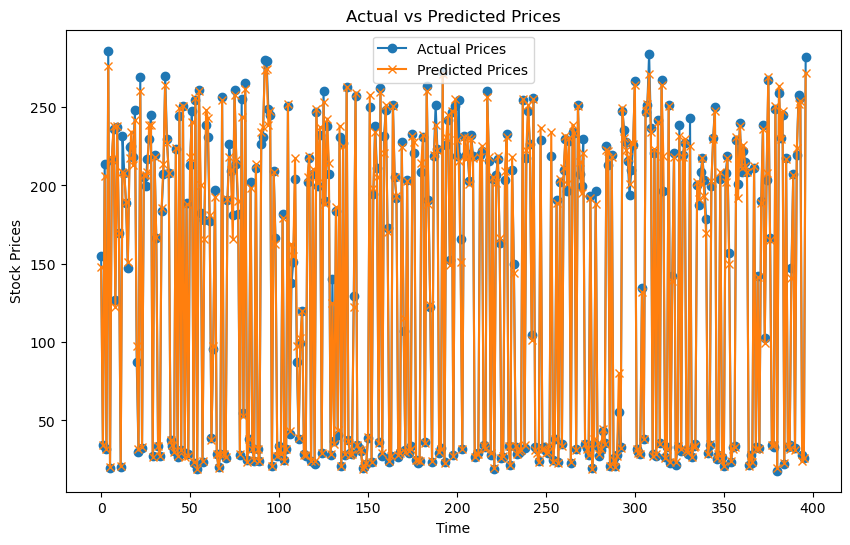

In [103]:
plt.figure(figsize=(10,6)) # Creates a plot window that is 10 units wide and 6 units tall.
plt.plot(y_test.values,label="Actual Prices", marker='o')# Plots the true stock prices from y_test.
plt.plot(y_predict, label="Predicted Prices", marker='x')# Plots the predicted stock prices from y_predict
plt.legend() # 	Adds a legend to explain which line is actual and which is predicted.
plt.xlabel("Time")
plt.ylabel("Stock Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

## Interpretation of  the Plot graph:
### •	You will see two lines:
#### One for Actual Prices (real stock prices).
#### One for Predicted Prices (model's output).
### •	Good Model:
#### The two lines will closely follow each other.
#### Small gaps between Actual and Predicted.
### •	Bad Model:
#### The two lines will be far apart.
#### Predicted prices will miss important jumps or drops.

### On other hund
#### Predicted line ≈ Actual line: then the model is Good model 
#### Predicted line ≠ Actual line (big gaps): then the model Bad model 

### from the above visualization plot our model is almost good because the plot will show two almost overlapping lines → Good prediction!

# 9 Deployment 

In [104]:
import joblib

# Assuming your trained model is named 'model'
joblib.dump(model, 'tesla_model.pkl')


['tesla_model.pkl']

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import joblib

# Load your trained model
model = joblib.load("tesla_model.pkl")

# Define prediction function
def predict_price():
    try:
        open_price = float(entry_open.get())
        high_price = float(entry_high.get())
        low_price = float(entry_low.get())
        close_price = float(entry_close.get())
        volume = float(entry_volume.get())
        
        features = np.array([[open_price, high_price, low_price,close_price, volume]])
        prediction = model.predict(features)
        result_label.config(text=f"📉 Predicted Closing Price: ${prediction[0]:.2f}")
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter valid numerical values.")

# Reset all fields
def reset_fields():
    entry_open.delete(0, tk.END)
    entry_high.delete(0, tk.END)
    entry_low.delete(0, tk.END)
    entry_close.delete(0, tk.END)
    entry_volume.delete(0, tk.END)
    result_label.config(text="")

# Create the GUI window
root = tk.Tk()
root.title("Tesla Stock Price Predictor")
root.geometry("400x350")

# Labels and entry fields
tk.Label(root, text="Open Price").pack()
entry_open = tk.Entry(root)
entry_open.pack()

tk.Label(root, text="High Price").pack()
entry_high = tk.Entry(root)
entry_high.pack()

tk.Label(root, text="Low Price").pack()
entry_low = tk.Entry(root)
entry_low.pack()

tk.Label(root, text="Close Price").pack()
entry_close = tk.Entry(root)
entry_close.pack()

tk.Label(root, text="Volume").pack()
entry_volume = tk.Entry(root)
entry_volume.pack()

# Buttons
tk.Button(root, text="Predict", command=predict_price).pack(pady=10)
tk.Button(root, text="Reset", command=reset_fields).pack(pady=5)

# Output label
result_label = tk.Label(root, text="", font=("Helvetica", 14))
result_label.pack(pady=10)

# Run the GUI
root.mainloop()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import gradio as gr
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load trained model
model = joblib.load("tesla_model.pkl")

# Define prediction and plotting function
def predict_and_plot(open_price, high_price, low_price, volume, close_price):
    try:
        # Prepare input
        input_data = {
            'Open': open_price,
            'High': high_price,
            'Low': low_price,
            'Volume': volume,
            'Close': close_price
        }

        # Ensure feature order matches model
        if hasattr(model, "feature_names_in_"):
            input_df = pd.DataFrame([{k: input_data[k] for k in model.feature_names_in_}])
        else:
            input_df = pd.DataFrame([input_data])

        # Make prediction
        prediction = model.predict(input_df)[0]

        # Plot result
        fig, ax = plt.subplots()
        ax.bar(["Predicted Close"], [prediction], color='blue')
        ax.set_ylabel("Price ($)")
        ax.set_title("Predicted Tesla Closing Price")

        return f"${prediction:.2f}", fig
    except Exception as e:
        return f"Error: {str(e)}", None

# Gradio Interface
inputs = [
    gr.Number(label="Open Price"),
    gr.Number(label="High Price"),
    gr.Number(label="Low Price"),
    gr.Number(label="Volume"),
    gr.Number(label="Close Price")
]

outputs = [
    gr.Text(label="Predicted Closing Price"),
    gr.Plot(label="Prediction Plot")
]

gr.Interface(fn=predict_and_plot, inputs=inputs, outputs=outputs, title="📈 Tesla Stock Predictor ").launch()


In [ ]:
import gradio as gr
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import tempfile
from sklearn.metrics import mean_absolute_error

# Load trained model
model = joblib.load("tesla_model.pkl")

def compare_actual_predicted(data):
    try:
        df = pd.DataFrame(data)

        if 'Date' not in df.columns:
            return "Error: 'Date' column is required", None, None

        df = df.dropna()
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df = df.dropna(subset=['Date'])

        feature_cols = model.feature_names_in_ if hasattr(model, "feature_names_in_") else ['Open', 'High', 'Low', 'Volume', 'Close']
        for col in feature_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df = df.dropna(subset=feature_cols)

        # Predict
        df['Predicted_Close'] = model.predict(df[feature_cols])

        # Calculate error if actual Close is present
        mae = None
        if 'Close' in df.columns:
            mae = mean_absolute_error(df['Close'], df['Predicted_Close'])

        # Prepare text output
        prediction_lines = [
            f"{date.date()} → Actual: ${actual:.2f} | Predicted: ${pred:.2f}"
            for date, actual, pred in zip(df['Date'], df['Close'], df['Predicted_Close'])
        ]
        text_output = "\n".join(prediction_lines)
        if mae is not None:
            text_output += f"\n\n📉 MAE: {mae:.2f}"

        # Plot actual vs predicted
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(df['Date'], df['Close'], marker='o', label="Actual", color='green')
        ax.plot(df['Date'], df['Predicted_Close'], marker='x', label="Predicted", color='blue')
        ax.set_title("Actual vs Predicted Close Prices")
        ax.set_xlabel("Date")
        ax.set_ylabel("Close Price ($)")
        ax.legend()
        ax.grid(True)
        fig.autofmt_xdate()

        # Save to temp CSV
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".csv")
        df.to_csv(temp_file.name, index=False)

        return text_output, fig, temp_file.name

    except Exception as e:
        return f"Error: {str(e)}", None, None

# Gradio app
gr.Interface(
    fn=compare_actual_predicted,
    inputs=gr.Dataframe(headers=["Date", "Open", "High", "Low", "Volume", "Close"], row_count=5),
    outputs=[
        gr.Text(label="Predicted vs Actual"),
        gr.Plot(label="Graph"),
        gr.File(label="Download .CSV")
    ],
    title="📊 Tesla Stock Price Predictor",
    description="Compare actual and predicted close prices. Includes graph, MAE, and downloadable CSV."
).launch(share=True)


In [ ]:
import gradio as gr 
import joblib

model = joblib.load("tesla_model.pkl")
def prediction(features):
    return model.predict(features)

interface=gr.Interface(
    fn=prediction,
    inputs=[
            gr.Number(label='Open'),
            gr.Number(label='High'),
            gr.Number(label='Low'),
            gr.Number(label='close'),
            gr.Number(label='Volume')
          ],
    outputs=gr.Number(label='predicted value')
)

interface.launch()
    

In [ ]:
import gradio as gr
import joblib

# Load your model
 model = joblib.load("tesla_model.pkl")

# Fix the function to accept 5 arguments
def prediction(open, high, low, close, volume):
    features = [[open, high, low, close, volume]]  # 2D array expected by scikit-learn
    return model.predict(features)[0]

# Gradio interface
interface = gr.Interface(
    fn=prediction,
    inputs=[
        gr.Number(label="Open"),
        gr.Number(label="High"),
        gr.Number(label="Low"),
        gr.Number(label="Close"),
        gr.Number(label="Volume")
    ],
    outputs=gr.Number(label="predicted value")
)

interface.launch()
